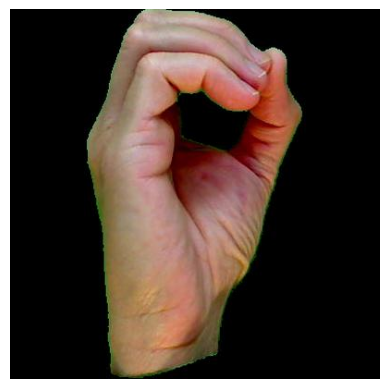

1/1 [==============================] - 8s 8s/step
[[9.97858107e-01 6.64755639e-10 2.06775610e-13 3.48028941e-12
  4.14115053e-09 6.87245616e-13 1.06401374e-10 2.04191351e-12
  8.30683005e-12 3.15639485e-12 4.63403079e-13 7.92471436e-11
  8.08209721e-10 1.17625111e-11 2.02026330e-11 1.71130059e-12
  8.00475199e-16 2.15010081e-14 3.19277077e-10 4.32062552e-10
  3.31241446e-15 3.52922634e-13 2.31799337e-11 3.76600140e-10
  2.14183796e-03 6.18697411e-12 1.77720870e-12 5.21635469e-13
  3.99854788e-10 1.04059122e-11 1.39040012e-11 4.63837968e-10
  1.29378680e-12 1.26118911e-08 2.86885750e-13 1.63225419e-10]]


In [10]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load the trained model
model = tf.keras.models.load_model('model.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((128, 128))  # Resize the image to match model input size
    img = np.array(img) / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to load and display image
def display_image(image_path):
    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return
    
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to read image from path: {image_path}")
        return
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

image_path = 'hand1_0_bot_seg_1_cropped.jpeg'
display_image(image_path)
img = preprocess_image(image_path)
predictions = model.predict(img)
print(predictions)


In [11]:
def detect_asl_signs(image, model, threshold=0.5):
    input_size = (128, 128)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, input_size)
    img_array = np.expand_dims(img_resized, axis=0) / 255.0

    predictions = model.predict(img_array)
    detections = []
    for i, pred in enumerate(predictions[0]):
        if pred > threshold:
            x, y, w, h = 0, 0, image.shape[1], image.shape[0]
            confidence = pred
            class_id = i
            detections.append((x, y, w, h, confidence, class_id))

    return detections

image_path = 'hand1_0_bot_seg_1_cropped.jpeg'
img = cv2.imread(image_path)
detections = detect_asl_signs(img, model)
print(detections)


1/1 [==============================] - 1s 573ms/step
[(0, 0, 400, 400, 0.9983266, 0)]


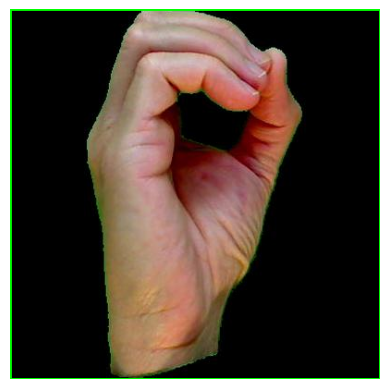

In [12]:
def draw_detections(image, detections):
    for (x, y, w, h, confidence, class_id) in detections:
        label = f'ASL Sign: {class_id} ({confidence:.2f})'
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return image

image_with_detections = draw_detections(img.copy(), detections)
plt.imshow(cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
